# Data Set 2: Tree Age predicton #

### Data set :  Tree Age Data

#### Description:#####
 

Maple is the most commonly used wood for making Violin.The sound quality depends upon the age of the wood used. A group of Violin makers collected sample of Maple trees and tried to predict the age of the wood using ‘Radio carbon dating’ process. Carbon 14 isotop was used in the carbon dating process.

Regression Problem: Predict the age of the wood

Predict the age of wood sample using the given measures.

Classification problem: Classify Maple tree as ‘Good’ quality or ‘Bad’ quality

We have to classify Maple tree as “Good”" quality wood or “Bad” quality wood for making a Violin. If the age of the tree is greater than 250 years, then it is considered as ‘Good’ quality.


#### Splitting the data into Training and Testing Sets:

Taken Aspect:
- 80% Training Data

- 20% Test Data


.

#### Necessary import modules ####

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import math
from pandas.stats.api import ols
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
import statsmodels.stats.diagnostic as sms
plot.offline.init_notebook_mode(connected = True)

#### Reading the csv file ####

In [2]:
regressions = pd.read_csv("Ex02_TreeData_Regreesion.csv")

## Correlation matrix ##

In [4]:
regressions.corr()

,N0,Nt,pH,PetalCount,Age
N0,1.000000,0.080825,0.053488,0.127779,-0.058794
Nt,0.080825,1.000000,0.003821,-0.003614,-0.980478
pH,0.053488,0.003821,1.000000,0.099505,0.007455
PetalCount,0.127779,-0.003614,0.099505,1.000000,0.053744
Age,-0.058794,-0.980478,0.007455,0.053744,1.000000


## Correlation Plot ##

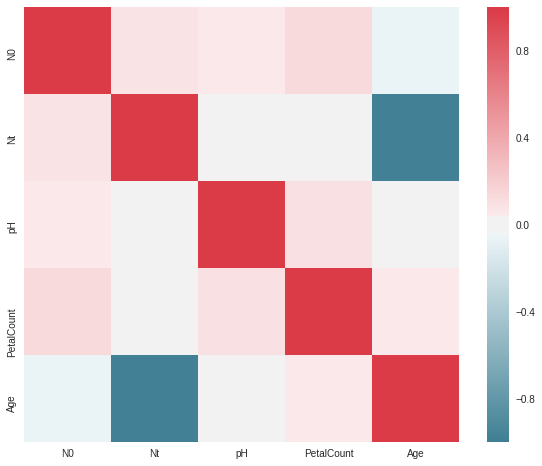

In [5]:
f, ax = plt.subplots(figsize = (10, 8))
corr = regressions.corr()
sns.heatmap(corr, 
            mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True,
            ax = ax)
plt.show()

##### Normalizing and Selecting testing and training data  ####

In [6]:
regressions['Log(Nt)'] = np.log(regressions['Nt'])


for i in regressions.columns.tolist():
    regressions[i] = np.absolute((regressions[i] - regressions[i].mean()) / (regressions[i].var()))
    
X_train = regressions.drop('Age', axis = 1).iloc[:-20]
Y_train = regressions.drop(['N0', 'Nt', 'pH', 'PetalCount', 'Log(Nt)'], axis = 1).iloc[:80]
X_test = regressions.drop('Age', axis = 1).iloc[80:]
Y_test = regressions.drop(['N0', 'Nt', 'pH', 'PetalCount', 'Log(Nt)'], axis = 1).iloc[80:]    




## LINEAR REGRESSION MODEL ##

In [7]:
regr = linear_model.LinearRegression()

#Regression coeffients
regr.fit(X_test,Y_test)
print ('Coefficients : ', regr.coef_) 
print ('\nIntercepts  : ', regr.intercept_)
print ('\nRoot Mean Square Error : ', math.sqrt(np.mean((regr.predict(X_test) - Y_test) ** 2)))

Coefficients :  [[  3.42812978e-05  -5.50763748e-04  -4.46124877e-07   1.65253557e-04
    6.47681323e-03]]

Intercepts  :  [-0.00068231]

Root Mean Square Error :  0.00033909544807483


## Model 1: Scatter plot ##

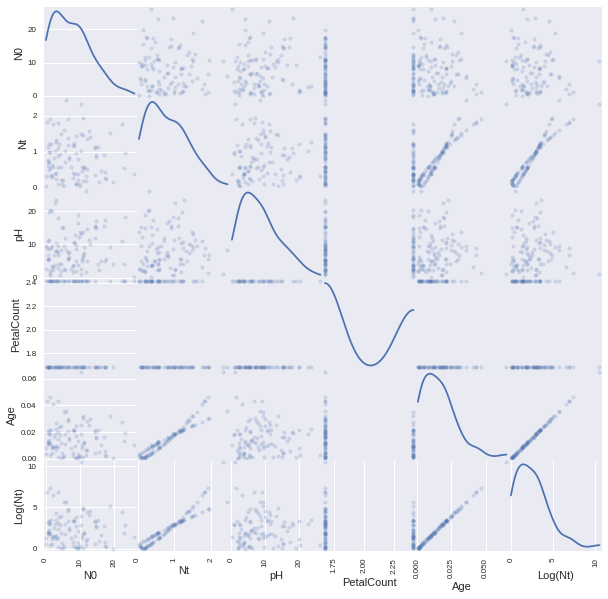

In [8]:
pd.scatter_matrix(regressions, alpha = .2, figsize = (10, 10), diagonal = 'kde')
plt.show()

## Model 2: OLS Model ##

### Part A:  Ols model with complete features ##

In [9]:
Nt_X_train = regressions.iloc[:80, regressions.columns == 'Nt']

Nt_X_test =  regressions.iloc[80:, regressions.columns == 'Nt']



#### Ols summary for all features taken ####

In [10]:
ols_result = sm.ols(formula = "Age ~ N0 + Nt + PetalCount + pH", data = regressions[:80]).fit()
print (ols_result.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           6.60e-37
Time:                        19:43:05   Log-Likelihood:                 334.85
No. Observations:                  80   AIC:                            -659.7
Df Residuals:                      75   BIC:                            -647.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0030      0.003      1.083      0.2

#### Actual v/s predicted value #### 

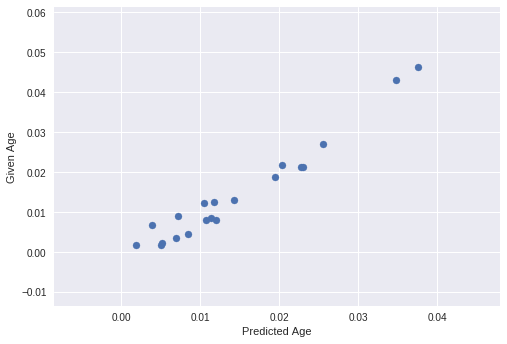

In [11]:
Predict_all = ols_result.predict(X_test)
plt.scatter(Predict_all, Y_test.Age)
plt.xlabel("Predicted Age")
plt.ylabel("Given Age")
plt.show()

### Part B: Ols model with feature named Nt only ### 

In [12]:
ols_result_Nt = sm.ols(formula = "Age ~ Nt", data = regressions[:80]).fit()
print (ols_result_Nt.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     661.9
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           7.45e-40
Time:                        19:43:19   Log-Likelihood:                 332.20
No. Observations:                  80   AIC:                            -660.4
Df Residuals:                      78   BIC:                            -655.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007      0.001     -0.851      0.3

#### Predicted age vs actual age ####

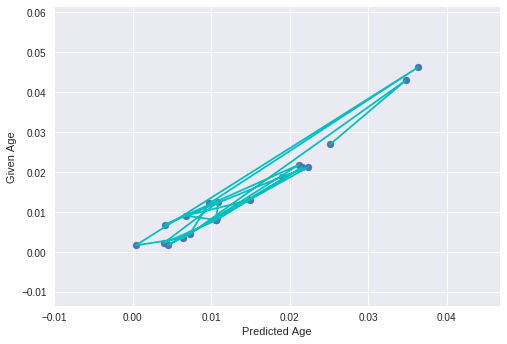

In [13]:
Predict_Nt = ols_result_Nt.predict(Nt_X_test['Nt'])
plt.scatter(Predict_Nt, Y_test.Age)
plt.plot(Predict_Nt, Y_test.Age, color = 'c')
plt.xlabel("Predicted Age")
plt.ylabel("Given Age")
plt.show()

### Part C: Ols model with Log(Nt) ###

In [14]:
ols_result_log_Nt = sm.ols(formula="Age ~ np.log(Nt)", data = regressions[:80]).fit()
ols_result_log_Nt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           9.96e-22
Time:                        19:43:27   Log-Likelihood:                 289.52
No. Observations:                  80   AIC:                            -575.0
Df Residuals:                      78   BIC:                            -570.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0210      0.001     25.150      0.000       0.019       0.023
np.log(Nt)     0.0104      0.001     13.287      0.000       0.009       0.012
==============================================================================
Omnibus:                       68.642   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.749
Skew:                           2.654   Prob(JB):                     1.77e-94
Kurtosis:                      13.067   Cond. No.                         1.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predicted age vs actual age ####

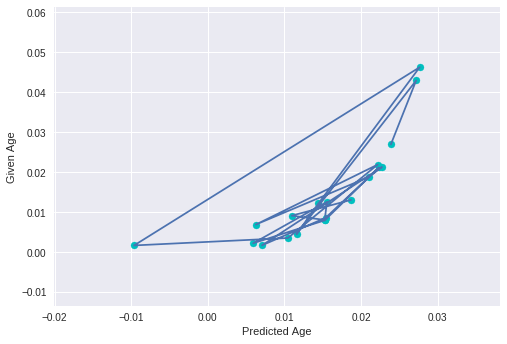

In [15]:
Predict_logNt = ols_result_log_Nt.predict(Nt_X_test['Nt'])
plt.scatter(Predict_logNt, Y_test.Age, color = 'c')
plt.plot(Predict_logNt, Y_test.Age)
plt.xlabel("Predicted Age")
plt.ylabel("Given Age")
plt.show()

#### rmse value of only log(Nt) value

In [16]:
rmse_logNt = np.mean((Y_test.Age - Predict_logNt)** 2)**(0.5)
rmse_logNt

0.007353303199791

## Box plot ##

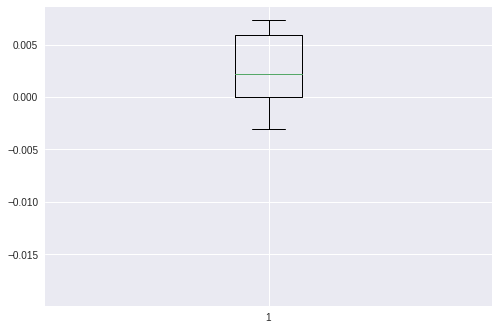

In [17]:
residual_logNt  = np.array(Predict_logNt - Y_test.Age)
plt.boxplot(residual_logNt)
plt.show()

## Residual plot histogram ##

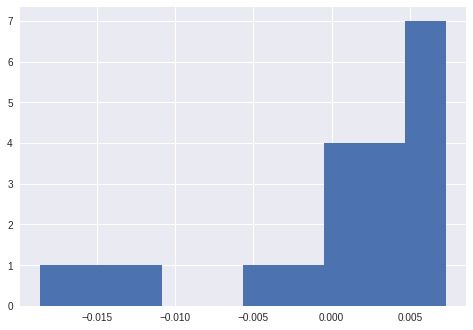

In [18]:
plt.hist(residual_logNt)
plt.show()

## Goldfeld Quandt Test ##

In [19]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(ols_result_log_Nt.resid, ols_result_log_Nt.model.exog)
list(zip(name, test))

[('F statistics', 0.2569201175632726), ('p_value', 0.99997050863259562)]

## Model 3: Ridge regression ##

In [23]:
alphas_ridge = 10 ** np.linspace(-5, 1, 100)
fdf=pd.DataFrame()
ridge = linear_model.Ridge(normalize = True)
coeff = []
for a in alphas_ridge:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, Y_train.Age)
    coeff.append(ridge.coef_)
    
    df = pd.DataFrame({'N0':[ridge.coef_[0]], 
                       'Nt' :[ridge.coef_[1]],
                       'pH':[ridge.coef_[2]],
                       'PetalCount':[ridge.coef_[3]],
                       'log(Nt)':[ridge.coef_[4]]})
    fdf = fdf.append(df)
    
fdf['alpha'] = alphas_ridge  




#### Ridge plot ####

In [25]:
trace0 = go.Scatter(
    x = alphas_ridge,
    y = fdf['N0'],
    name = 'N0',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = alphas_ridge,
    y = fdf['Nt'],
    name = 'Nt',
    line = dict(
        color = ('rgb(22, 96, 17)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = alphas_ridge,
    y = fdf['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(205, 0, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = alphas_ridge,
    y = fdf['PetalCount'],
    name = 'Petal Count',
    line = dict(
        color = ('rgb(220, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = alphas_ridge,
    y = fdf['log(Nt)'],
    name = 'logNt',
    line = dict(
        color = ('rgb(10, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)

plot.iplot(fig, filename = 'WEIGHTS_VS_ALPHAS_TREEAGE')

#### Finding the ridge coefficients  ####

In [26]:
ridge2 = linear_model.Ridge(alpha = 20, normalize = True)
ridge2.fit(X_train, Y_train.Age)

# Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)

# Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X_train.columns))

# Print coefficients
print(mean_squared_error(Y_test.Age, pred2))

N0           -0.000001
Nt            0.000882
pH           -0.000010
PetalCount   -0.000346
Log(Nt)       0.000284
dtype: float64
0.000129648566741


In [27]:
data = []
p = go.Scatter(x = alphas_ridge, y = mean_squared_error(Y_test.Age, pred2),
               mode = 'lines+markers', 
               name = 'Mean Error',
               hoverinfo = 'name',
               line = dict(shape = 'linear'))
data.append(p)        
layout = dict(
    title = 'MEAN SQUARE ERROR VS ALPHAS',
    xaxis = dict(
        title = 'ALPHAS'
    ),
    yaxis = dict(
        title = 'MEAN SQUARE ERROR'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 15)
    )
)
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'MEANERROR_VS_APLHA_TREEAGE')

#### Most accurate alpha value ####

In [28]:
ridgecv = linear_model.RidgeCV(alphas = alphas_ridge, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.00032745491628777284

#### least mean square error value ####

In [29]:
ridge4 = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, Y_train)
mean_squared_error(Y_test, ridge4.predict(X_test))

1.5420027645516439e-07


#### Final efficient coefficients ####

In [30]:
ridge4.fit(X_train, Y_train.Age)
pd.Series(ridge4.coef_, index = X_train.columns)

N0            0.000009
Nt            0.000009
pH           -0.000003
PetalCount   -0.000093
Log(Nt)       0.006225
dtype: float64

## LASSO Regression ##

In [31]:
alphas_lasso = 10 ** np.linspace(-2, 2, 100)

lasso = linear_model.Lasso(max_iter = 10000, normalize = True)
coefs = []
for a in alphas_lasso:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, Y_train.Age)
    coefs.append(lasso.coef_)


coefs = np.array(coefs)
df_lasso = (pd.DataFrame(coefs, columns = X_train.columns, index = alphas_lasso))


#### Weights vs Alphas ####

In [32]:
trace0 = go.Scatter(
    x = alphas_lasso,
    y = df_lasso['N0'],
    name = 'N0',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
        x = alphas_lasso,
    y = df_lasso['Nt'],
    name = 'Nt',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = alphas_lasso,
    y = df_lasso['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = alphas_lasso,
    y = df_lasso['PetalCount'],
    name = 'Petal Count',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = alphas_lasso,
    y = df_lasso['Log(Nt)'],
    name = 'logNt',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='lassoRegression.html')



#### mean square error ####

In [37]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train.Age)
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, Y_train.Age)
mean_squared_error(Y_test.Age, lassocv.predict(X_test))

1.8047789770454245e-07

#### Final coefficients ####

In [38]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index = X_test.columns)

N0            0.000000
Nt            0.000000
pH           -0.000000
PetalCount   -0.000000
Log(Nt)       0.006194
dtype: float64

Since Log(Nt) dominating as compared to the rest of the features, now we'll finally select these features and do the ols model for the same

## OLS Model ##

In [39]:
ols_improved = sm.ols(formula = "Age ~ np.log(Nt)", data = regressions[:80]).fit()
print (ols_improved.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           9.96e-22
Time:                        19:50:05   Log-Likelihood:                 289.52
No. Observations:                  80   AIC:                            -575.0
Df Residuals:                      78   BIC:                            -570.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0210      0.001     25.150      0.0

#### rmse value ####

In [40]:
Predict_improved = ols_improved.predict(X_test)
rmse_improved = np.mean((Y_test.Age - Predict_improved) ** 2) ** (0.5)
rmse_improved

0.007353303199791

#### Box plot ####

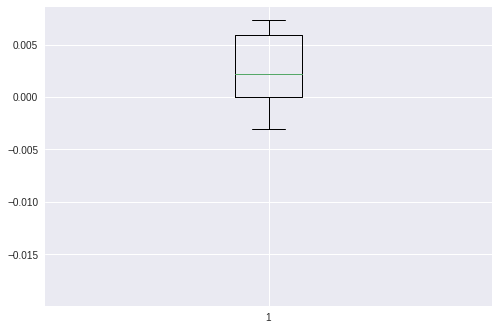

In [41]:
residual_improved  = np.array(Predict_improved - Y_test.Age)
plt.boxplot(residual_improved)
plt.show()

#### Predicted vs actual age ####

In [42]:
trace1 = go.Scatter(
    x = Predict_improved,
    y = Y_test.Age,
    mode = 'markers',
    name = 'PREDICTED VS ORIGINAL',
    line = dict(shape = 'linear')
)
trace2 = go.Scatter(
    x = Y_test.Age,
    y = Y_test.Age,
    mode = 'lines',
    name = 'x = y',
    line = dict(shape = 'linear')
)
data = [trace1, trace2]
layout = dict(
    title = 'PREDICTED VS ORIGINAL',
    yaxis = dict(
        title = 'PREDICTED VALUE'
    ),
    xaxis = dict(
        title = 'ORIGINAL VALUE'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    )
)
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'SCATTER PLOT FOR OLS')


#### Residual plot Histogram ####

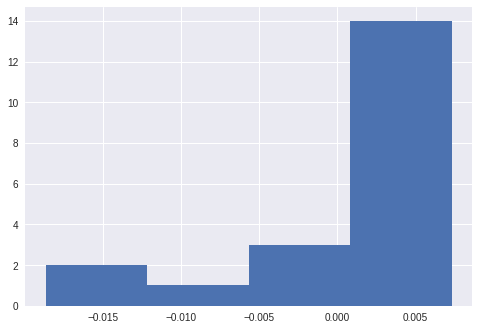

In [43]:
plt.hist(residual_improved, bins = 4)
plt.show()

#### Goldfeld Quandt Test ####

In [44]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(ols_improved.resid, ols_improved.model.exog)
list(zip(name, test))

[('F statistics', 0.2569201175632726), ('p_value', 0.99997050863259562)]